# Analysis Tutorial

This tutorial demonstrates how to analyze and interpret the outputs from Connectomemapper 3. In particular it will:

- Get the list of connectome files with [`pybids`](https://pypi.org/project/pybids/)
- Read the .tsv connectome files with [`networkx`](https://pypi.org/project/networkx/)
- Visualize with the plot functions of [`nilearn`](https://pypi.org/project/nilearn/) ([docs](https://nilearn.github.io/stable/index.html))
- Analyze with [`bctpy (Brain Connectivity Toolbox)`](https://pypi.org/project/bctpy/)

In [2]:
from bids import BIDSLayout
import networkx as nx
import pandas as pd
import nilearn
from nilearn import plotting
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from bctpy import algorithms
import datalad.api as dl

C:\Users\mikke\Anaconda3\envs\cmp3-tut\lib\site-packages\nilearn\datasets\__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


For demonstration, we are going to use an example dataset from [Open Neuro](https://openneuro.org/datasets/ds003505/versions/1.0.2) that already contains output from Connectomemapper.

In [3]:
# download example dataset with datalad
# uncomment next line once the new dataset is up
#vepcon_data = dl.install(path=os.path.join("..", "..", "example_data"),
#                         source="https://github.com/OpenNeuroDatasets/ds003505.git")

As the dataset is in [BIDS](https://bids.neuroimaging.io/), we can use `pybids` to help us load the data.

In [24]:
layout = BIDSLayout(vepcon_data.path)
# add derivative folder containing the connectivity matrices
layout.add_derivatives(os.path.join(vepcon_data.path, "derivatives", "cmp-v3.0.0-beta-RC1"))

NameError: name 'vepcon_data' is not defined

In [4]:
#layout = BIDSLayout(vepcon_data.path)
path = os.path.join("..", "..", "hcp-retest-d2")
layout = BIDSLayout(path)
# add derivative folder containing the connectivity matrices
#layout.add_derivatives(os.path.join(vepcon_data.path, "derivatives", "cmp-v3.0.0-beta-RC1"))
layout.add_derivatives(os.path.join(path, "derivatives", "cmp-v3.0.0"))
con_files = layout.get(subject='103818', extension='tsv', suffix='connectivity', return_type='filename')

In [5]:
con_files[0]

'C:\\Users\\mikke\\connectomemapper3\\notebooks\\..\\..\\hcp-retest-d2\\derivatives\\cmp-v3.0.0\\sub-103818\\ses-01\\dwi\\sub-103818_ses-01_atlas-L2018_res-scale1_conndata-network_connectivity.tsv'

In [6]:
os.getcwd()

'C:\\Users\\mikke\\connectomemapper3\\notebooks'

In [8]:
#vepcon_data.get(con_files[0])
path_hcp = os.path.join("..", "..", "hcp_example")

In [14]:
#edges = pd.read_csv(con_files[0], delimiter="\t")
path_tsv = os.path.join(path_hcp, "sub-100307_atlas-L2018_res-scale1_conndata-network_connectivity.tsv")
edges = pd.read_csv(path_tsv, delimiter="\t")

In [15]:
edges

,source,target,number_of_fibers,fiber_length_mean,fiber_length_median,fiber_length_std,fiber_proportion,fiber_density,normalized_fiber_density,FA_mean,FA_std,FA_median,ADC_mean,ADC_std,ADC_median
0,1,43,1275,18.864727,16.058386,11.975668,0.186114,0.005490,0.008352,0.327818,0.146587,0.305028,0.000598,0.000086,0.000588
1,1,1,3946,8.535786,6.804827,5.151622,0.576004,0.034610,0.052654,0.314662,0.144341,0.294677,0.000585,0.000076,0.000571
2,1,20,76,118.715965,114.774269,13.143189,0.011094,0.000045,0.000069,0.541475,0.150016,0.544120,0.000620,0.000056,0.000615
3,1,32,99,78.879990,98.564438,33.893044,0.014451,0.000065,0.000098,0.461895,0.145461,0.469366,0.000608,0.000065,0.000603
4,1,4,1073,11.444057,8.865350,6.503943,0.156627,0.008525,0.012970,0.299846,0.164620,0.291774,0.000643,0.000091,0.000634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,123,126,33,31.106052,32.249992,5.909615,0.004817,0.000263,0.000400,0.410691,0.147794,0.410671,0.000754,0.000397,0.000614
3609,124,124,27,20.656191,17.499996,6.978199,0.003941,0.000066,0.000100,0.454778,0.156671,0.430000,0.000689,0.000226,0.000620
3610,124,125,9,62.590576,62.315189,6.402785,0.001314,0.000010,0.000016,0.512255,0.154537,0.513908,0.000616,0.000196,0.000575
3611,124,126,1,33.815388,33.815388,0.000000,0.000146,0.000003,0.000004,0.534337,0.118871,0.556027,0.000555,0.000036,0.000555


In [16]:
G = nx.from_pandas_edgelist(edges, edge_attr=True)

In [ ]:
edges.columns

In [17]:
A = nx.to_numpy_matrix(G, weight="number_of_fibers")

In [ ]:
A.shape

In [ ]:
A

number_of_fibers


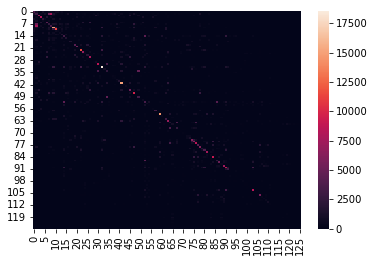

fiber_length_mean


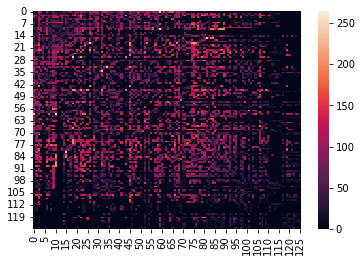

fiber_length_median


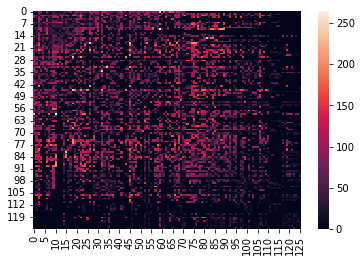

fiber_length_std


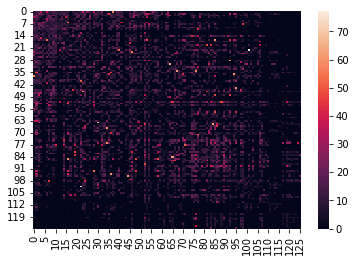

fiber_proportion


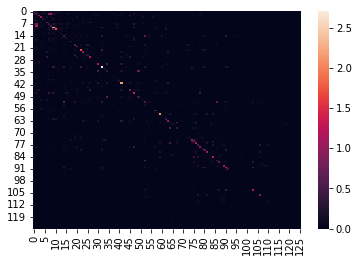

fiber_density


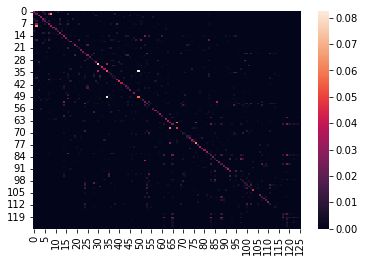

normalized_fiber_density


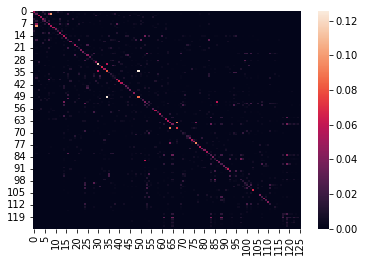

FA_mean


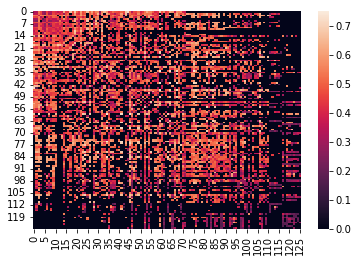

FA_std


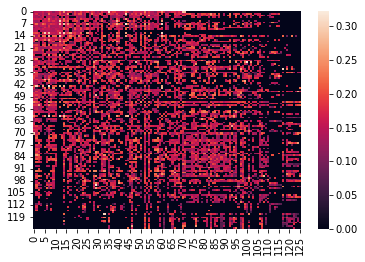

FA_median


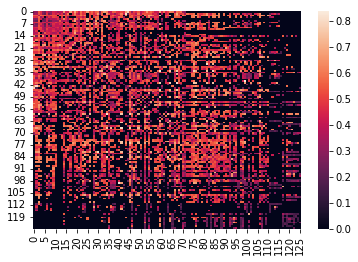

ADC_mean


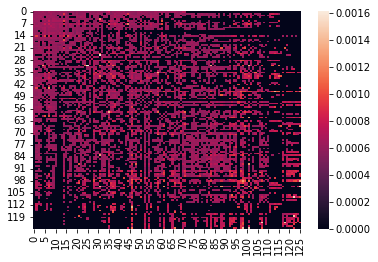

ADC_std


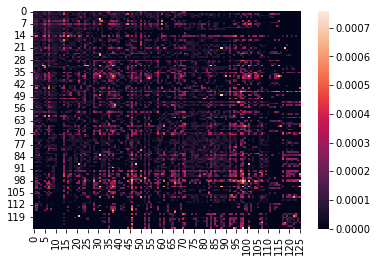

ADC_median


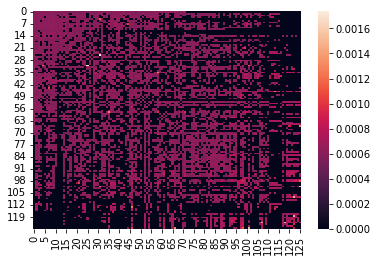

In [18]:
for c in edges.columns[2:]:
    A = nx.to_numpy_matrix(G, weight=c)
    print(c)
    sns.heatmap(A)
    plt.show()

In [19]:
#parcellation_path = os.path.join(path, "code",
#                                 "sub-colin27_T1w_parc_scale1.nii.gz")
parcellation_path = os.path.join(path_hcp, "sub-100307_atlas-L2018_res-scale1_dseg.nii.gz")
coords, labels = plotting.find_parcellation_cut_coords(parcellation_path, return_label_names=True)

In [ ]:
os.getcwd()

In [20]:
coords_df = pd.DataFrame(coords, columns=["x","y","z"])
coords_df.to_csv("coords.csv")

In [22]:
A = nx.to_numpy_matrix(G, weight="fiber_density")

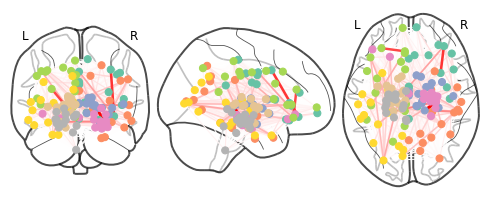

In [23]:
plotting.plot_connectome(np.array(A), coords)